In [2]:
from Bio import SeqIO
import csv
import numpy as np
import functools
import operator

In [3]:
overlaps_fname = '/Users/esaliya/sali/data/scope/uniqs/all/overlaps/head_100_of_k6.overlaps.txt'
seqs_fname = '/Users/esaliya/sali/data/scope/uniqs/all/77040_unique_of_243813_astral-scopedom-seqres-gd-all-2.07-stable.fa'

In [4]:
# All super-families dictionary. Each super family entry will have list,
# where the first element is the number of families in it and the second
# is a dictionary for each of its families (family name -> sequence count in family).
all_sfs = {}
fam_names = []
sf_names = []
limit = 'all'
with open(seqs_fname, "r") as seqf:
    count = 0
    for record in SeqIO.parse(seqf, "fasta"):
        if count != 'all' and count == limit:
            break
        l_idx = record.description.index(" ")
        r_idx = record.description.index(" ", l_idx+1)
        cls, fold, sf, fam = record.description[l_idx: r_idx].split('.')
        fam_names.append(fam)
        sf_names.append(sf)
        if sf in all_sfs:
            sf_fams = all_sfs[sf][1]
            if fam in sf_fams:
                sf_fams[fam] += 1
            else:
                sf_fams[fam] = 1
            all_sfs[sf][0] += 1
        else:
            all_sfs[sf] = [1, {fam: 1}]

        count += 1

In [17]:
num_sf = len(all_sfs.keys())
num_fam = sum([len(all_sfs[k][1].keys()) for k in all_sfs])
print("Num super families: ", num_sf)               
print("Num families: ", num_fam)

all_sf_fams_seq_counts = [list(all_sfs[k][1].values()) for k in all_sfs]
fam_seq_counts = np.array(functools.reduce(operator.iconcat, all_sf_fams_seq_counts, []))
sf_seq_counts = np.array([sum(sf_fams_seq_counts) for sf_fams_seq_counts in all_sf_fams_seq_counts])
print(fam_seq_counts)
print(sf_seq_counts)

Num super families:  61
Num families:  436
[17082 21559  6851  2625  1722   581   423   223  1225   546  1747   923
   500   173   175    95    58    85   180   150    48    59    72    29
    73    30     9    16     9    91    49    18    10    15    18    10
    22     9     5     2    10    12     3     3     7     5     8     2
     6     2    16     4     1     4     3     3     1     3     3     1
    13    11  1298  1763   330   315   112    57    40    24    20     2
     3    10    47    24     7     6   818   352   562    67    37   109
    39     2     1     1    26     4     5    10    15    13     3   686
  1008   182   241    70   134    24    76    43    21    15    12     8
     8     9     8     9     7     3     6     4     2     9     6     2
     5     7     3     6     1     1   480   527    12    11     7     6
    16     1     2     2     1    19   229     2    32    12    11    19
     2     2    66    13    80     2     8     6     1     6    12     1
     3  

In [19]:
# Number of family pairs (top triangle only, excludes diagonal as well)
num_fam_pairs = np.sum(fam_seq_counts * (fam_seq_counts - 1) / 2)
# Number of super-family pairs (top triangle only, excludes diagonal as well). Includes family pairs too.
num_sf_pairs = np.sum(sf_seq_counts * (sf_seq_counts - 1) / 2)
num_sf_only_pairs = num_sf_pairs - num_fam_pairs
print(num_fam_pairs, num_sf_pairs, num_sf_only_pairs)


415231268.0 1679985392.0 1264754124.0


In [20]:
all_pair_count = 77040*77039/2
print(num_fam_pairs / all_pair_count)
print(num_sf_pairs / all_pair_count)

0.1399242972201225
0.5661201201150199


In [28]:
num_A, num_B, num_C = 0, 0, 0
with open(overlaps_fname) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for g_col, g_row in csv_reader:
        g_col = int(g_col)
        g_row = int(g_row)
        if sf_names[g_col] == sf_names[g_row]:
            num_B += 1
            if fam_names[g_col] == fam_names[g_row]:
                num_A += 1
        else:
            num_C += 1
        line_count += 1
            

In [29]:
print(num_A, num_B, num_C)

100 100 0


In [24]:
recall = num_A / num_fam_pairs
precision = (num_A + num_B) / (num_A+num_B+num_C)
print(recall, precision)

2.40829647732598e-07 1.0


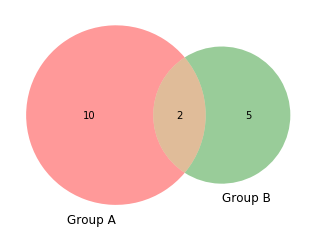

In [26]:
#%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3, venn3_circles

# First way to call the 2 group Venn diagram:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()

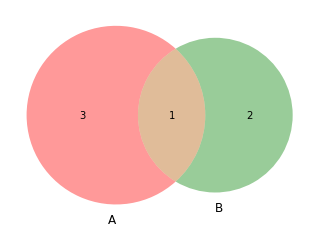

In [27]:
# Second way
venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])
plt.show()

